# This is python data analysis project. I will be working with a real dataset from Udemy. This dataset contains details about Udemy courses, some of the insights I will be working to extract from this datset includes:

1) What are the total numbers of subscribers in each subject?

2) How many courses are free and paid for each subject?

3) How does the average content duration/price/number of students vary across different subjects?

4) What is the average price of web development courses at different levels?

5) What are the 20 most popular courses? Also, include the following information:
   - Their level
   - Whether they are free or paid
   - Whether any are free beginner courses,
   - and the duration of the courses.
   
6) Does content duration impact the price of the course?

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:


current_dir = os.getcwd()
current_dir

'C:\\Users\\Ahans\\Downloads\\Python Folder'

In [3]:
df = pd.read_csv('../udemy_course_data.csv', encoding='latin1')

In [3]:
df = df.drop(columns = 'Free or Paid', inplace=False)



In [4]:
df.head(5)

,course_id,course_title=,url,Price,Free beginer course,num_subscribers,num_reviews,num_lectures,level,rating,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,Yes,268923,8629,45,Beginner Level,0.82,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,No,161029,279,27,Expert Level,0.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,No,121584,27445,342,Beginner Level,0.89,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0,No,120291,5924,30,All Levels,0.78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200,No,114512,22412,304,Beginner Level,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#trying to get an overview of what my dataset looks like.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3611 non-null   int64  
 1   course_title=        3611 non-null   object 
 2   url                  3611 non-null   object 
 3   Price                3611 non-null   int64  
 4   Free beginer course  3611 non-null   object 
 5   num_subscribers      3611 non-null   int64  
 6   num_reviews          3611 non-null   int64  
 7   num_lectures         3611 non-null   int64  
 8   level                3611 non-null   object 
 9   rating               3611 non-null   float64
 10  content_duration     3611 non-null   float64
 11  published_timestamp  3611 non-null   object 
 12  subject              3611 non-null   object 
 13  Unnamed: 14          0 non-null      float64
 14  Unnamed: 15          0 non-null      float64
 15  Unnamed: 16          0 non-null      f

(3611, 27)

In [6]:
#dropping the empty column
df = df.dropna(axis='columns', inplace = False)



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3611 entries, 0 to 3610
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3611 non-null   int64  
 1   course_title=        3611 non-null   object 
 2   url                  3611 non-null   object 
 3   Price                3611 non-null   int64  
 4   Free beginer course  3611 non-null   object 
 5   num_subscribers      3611 non-null   int64  
 6   num_reviews          3611 non-null   int64  
 7   num_lectures         3611 non-null   int64  
 8   level                3611 non-null   object 
 9   rating               3611 non-null   float64
 10  content_duration     3611 non-null   float64
 11  published_timestamp  3611 non-null   object 
 12  subject              3611 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 366.9+ KB


In [8]:
#Question1: showing total subscribers for each subject

total_subscribers = df.groupby('subject')['num_subscribers'].sum()
print(total_subscribers)

subject
Business Finance       1868711
Graphic Design         1063148
Musical Instruments     846689
Web Development        7981935
Name: num_subscribers, dtype: int64


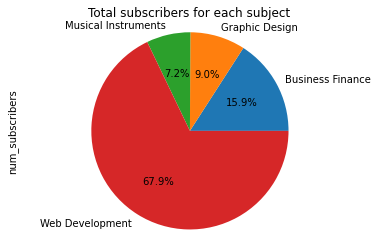

In [9]:
#Visual representation of Question1 showing total subscribers for each subject

subject_subscribers = df.groupby('subject')['num_subscribers'].sum()

subject_subscribers.plot(kind='pie', title='Total subscribers for each subject', autopct='%1.1f%%')
#plt.ylabel('')  
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [10]:
#Question2: showing the amount of free or paid courses in each subject. First I created a free or paid column from the
#price column

df['free_or_paid'] = df['Price'].apply(lambda x: 'free' if x == 0 else 'paid')

In [11]:
df.head(3)

,course_id,course_title=,url,Price,Free beginer course,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,free_or_paid
0,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0,Yes,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,free
1,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0,No,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,free
2,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200,No,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,paid


In [12]:
free_paid = df.groupby(['subject', 'free_or_paid']).size().unstack()
free_paid


free_or_paid,free,paid
subject,,
Business Finance,96,1059
Graphic Design,35,549
Musical Instruments,46,623
Web Development,134,1069


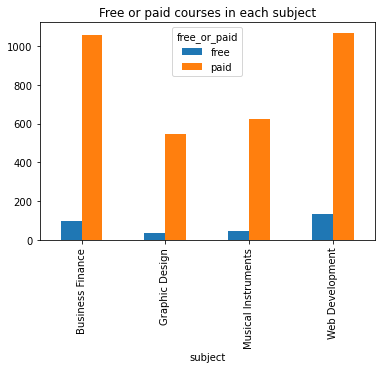

In [13]:
#Visual representation of question2

free_paid = df.groupby(['subject', 'free_or_paid']).size().unstack(fill_value=0).plot(kind='bar', title="Free or paid courses in each subject")
plt.show()

In [14]:
#Question3: showing the subjects variation of "average content duration", "price" and "number of subscribers" across
#different subjects

avaerage_content = df.groupby('subject')['content_duration'].mean()

In [15]:
print(avaerage_content.to_markdown(index=True))

| subject             |   content_duration |
|:--------------------|-------------------:|
| Business Finance    |            3.61889 |
| Graphic Design      |            3.64957 |
| Musical Instruments |            2.88508 |
| Web Development     |            5.58666 |


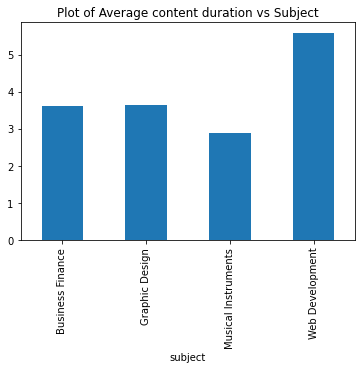

In [16]:
#Visual representation averahe content duration and subjects

avaerage_content = df.groupby('subject')['content_duration'].mean().plot(kind= 'bar', title='Plot of Average content duration vs Subject')

In [17]:
avg_price_and_subject = df.groupby('subject')['Price'].mean()
print(avg_price_and_subject.to_markdown())


| subject             |   Price |
|:--------------------|--------:|
| Business Finance    | 69.0779 |
| Graphic Design      | 58.7671 |
| Musical Instruments | 49.6487 |
| Web Development     | 77.0366 |


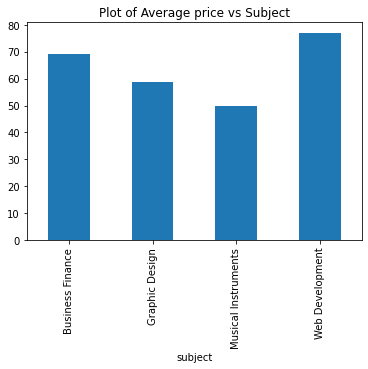

In [18]:
#Visual representation of average price vs subjects

avg_price_and_subject = df.groupby('subject')['Price'].mean().plot(kind='bar', title='Plot of Average price vs Subject')

In [19]:
avg_subscribers = df.groupby('subject')['num_subscribers'].mean()
print(avg_subscribers.to_markdown())

| subject             |   num_subscribers |
|:--------------------|------------------:|
| Business Finance    |           1617.93 |
| Graphic Design      |           1820.46 |
| Musical Instruments |           1265.6  |
| Web Development     |           6635.02 |


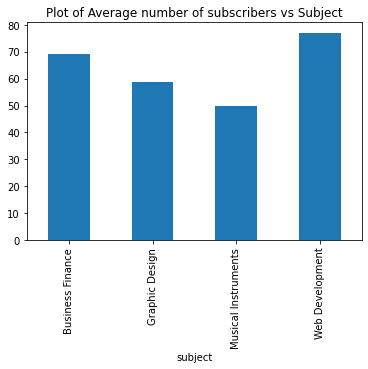

In [4]:
#Visual representation of average number of subscribers vs subjects

avg_price_and_subject = df.groupby('subject')['Price'].mean().plot(kind='bar', title='Plot of Average number of subscribers vs Subject')

In [21]:
#Question4: Average price of web development courses at each level

web_dev_courses = df.loc[df.subject=='Web Development', :] #extract only web development courses from subject column

web_dev_courses.groupby(['subject', 'level']).Price.mean().unstack()

level,All Levels,Beginner Level,Expert Level,Intermediate Level
subject,,,,
Web Development,74.549763,78.542654,67.142857,85.074627


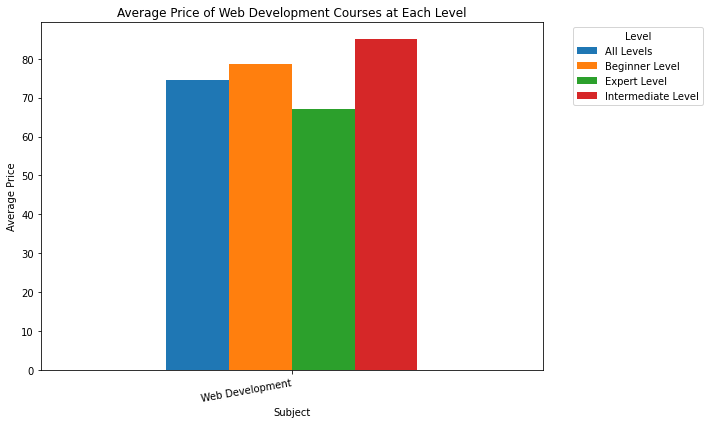

In [22]:
#Visual representation of average price of web development courses at each level

grouped_data = web_dev_courses.groupby(['subject', 'level']).Price.mean().unstack()

my_plot = grouped_data.plot(kind='bar', title='Average Price of Web Development Courses at Each Level', figsize=(10, 6))

# Set labels and legend
my_plot.set_xlabel('Subject')
my_plot.set_ylabel('Average Price')
my_plot.legend(title='Level', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=10, ha='right')

# Show plot
plt.tight_layout()
plt.show()


In [23]:
#Question5: What are the 20 most popular courses. First we sort the dataset by number of subscribers and choose first 20.

sorted_data = df.sort_values(by = 'num_subscribers', inplace = False, ascending = False).head(21).set_index(['course_title='])

sorted_data

,course_id,url,Price,Free beginer course,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject,free_or_paid
course_title=,,,,,,,,,,,,,
Learn HTML5 Programming From Scratch,41295,https://www.udemy.com/learn-html5-programming-...,0,Yes,268923,8629,45,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Web Development,free
Coding for Entrepreneurs Basic,59014,https://www.udemy.com/coding-for-entrepreneurs...,0,No,161029,279,27,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Web Development,free
The Web Developer Bootcamp,625204,https://www.udemy.com/the-web-developer-bootcamp/,200,No,121584,27445,342,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Web Development,paid
Build Your First Website in 1 Week with HTML5 and CSS3,173548,https://www.udemy.com/build-your-first-website...,0,No,120291,5924,30,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Web Development,free
The Complete Web Developer Course 2.0,764164,https://www.udemy.com/the-complete-web-develop...,200,No,114512,22412,304,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Web Development,paid
Free Beginner Electric Guitar Lessons,19421,https://www.udemy.com/beginner-electric-guitar...,0,No,101154,1042,95,All Levels,0.88,4.5,2012-06-15T17:00:33Z,Musical Instruments,free
Web Design for Web Developers: Build Beautiful Websites!,473160,https://www.udemy.com/web-design-secrets/,0,No,98867,6512,20,All Levels,0.82,3.0,2015-04-13T18:29:47Z,Web Development,free
Learn Javascript & JQuery From Scratch,94430,https://www.udemy.com/learn-javascript-jquery-...,30,No,84897,2685,10,All Levels,0.79,2.0,2013-10-10T15:19:29Z,Web Development,paid
Practical PHP: Master the Basics and Code Dynamic Websites,130064,https://www.udemy.com/code-dynamic-websites/,0,No,83737,4598,45,Intermediate Level,0.85,6.5,2014-07-19T03:02:05Z,Web Development,free


In [24]:
Top_20 = sorted_data.loc[:,["num_subscribers", "level", "free_or_paid","Free beginer course", "content_duration"]]
Top_20 

,num_subscribers,level,free_or_paid,Free beginer course,content_duration
course_title=,,,,,
Learn HTML5 Programming From Scratch,268923,Beginner Level,free,Yes,10.5
Coding for Entrepreneurs Basic,161029,Expert Level,free,No,3.5
The Web Developer Bootcamp,121584,Beginner Level,paid,No,43.0
Build Your First Website in 1 Week with HTML5 and CSS3,120291,All Levels,free,No,3.0
The Complete Web Developer Course 2.0,114512,Beginner Level,paid,No,30.5
Free Beginner Electric Guitar Lessons,101154,All Levels,free,No,4.5
Web Design for Web Developers: Build Beautiful Websites!,98867,All Levels,free,No,3.0
Learn Javascript & JQuery From Scratch,84897,All Levels,paid,No,2.0
Practical PHP: Master the Basics and Code Dynamic Websites,83737,Intermediate Level,free,No,6.5


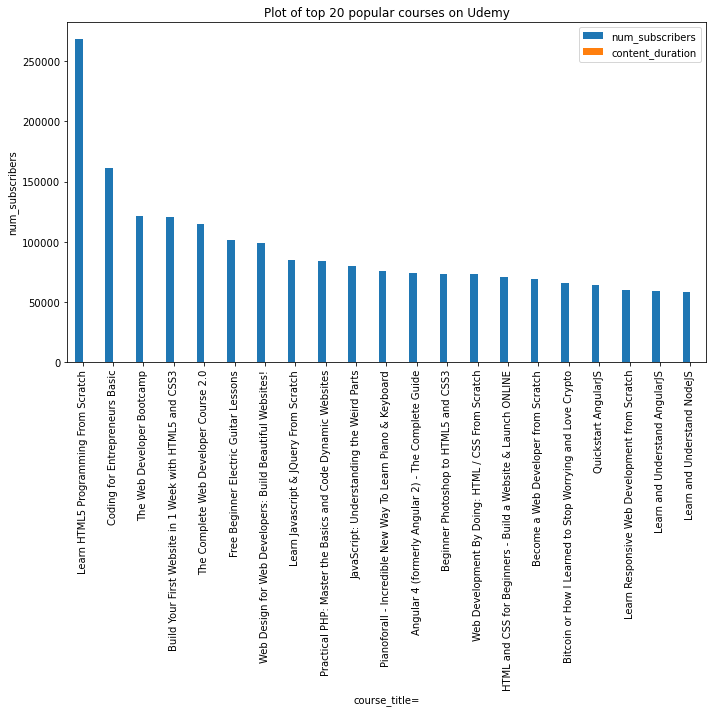

In [25]:
plot = Top_20.plot(kind='bar', title='Plot of top 20 popular courses on Udemy', figsize=(10, 10))

plot.set_xlabel('course_title=') 
plot.set_ylabel('num_subscribers')

plt.tight_layout()
plt.show()


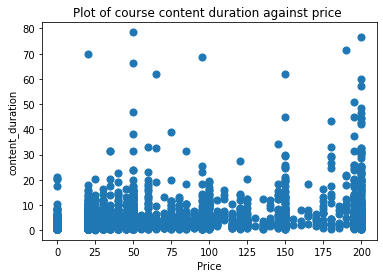

In [26]:
df.plot.scatter(x= 'Price', y= 'content_duration', s=50, title = 'Plot of course content duration against price ' )

plt.show()